<center><h1 style="text-decoration: underline;">A Customer Churn Prediction</h1></center>

### Project Scenario
Every company wants to increase its profit or revenue margin and customer retention is one key area industry players focus their resources. In today's world of machine learning, most companies build classification models to perform churn analysis on their customers. 

Classification in machine learning and statistics entails a supervised learning approach where the computer program learns from provided data to make new observations or classifications. The primary objective is to determine the class or category into which new data points will fall. In this project scenario, an elaborate analysis will be conducted to train at least four models for predicting customer churn in a telecom company. This analysis will adhere to the **CRISP-DM framework**, ensuring a structured and systematic approach to model development and evaluation.

##### <h1 style="text-decoration: underline;">Hypothesis Testing</h1>
### Hypothesis1
***Null Hypothesis(Ho)***: Customers with longer tenure (number of months stayed with the company) are more likely to churn compared to new customers.

***Alternative Hypothesis(Ha)***:  Customers with longer tenure (number of months stayed with the company) are less likely to churn compared to new customers.


### Hypothesis2
***Null Hypothesis(Ho)***: Customers with higher monthly charges (MonthlyCharges) are more likely to churn due to cost considerations.

***Alternative Hypothesis(Ha)***: Customers with higher monthly charges (MonthlyCharges) are less likely to churn due to cost considerations.

##### <h1 style="text-decoration: underline;">Business Questions</h1>

1. What is the average tenure of customers who churned compared to those who stayed?
2. Do customers with partners or dependents have a lower churn rate?
3. How does the presence of multiple lines affect customer churn?
4. Is there a correlation between the contract term (Contract) and customer churn?
5. What are the common payment methods (Payment Method) among customers who churned?
6. How does the availability of tech-related services (e.g., OnlineSecurity, TechSupport) impact churn rates?
7. What percentage of customers who churned had streaming services (StreamingTV, StreamingMovies)?
8. Is there a difference in churn rates between senior citizens and non-senior citizens?
9. How does the total amount charged to customers (TotalCharges) correlate with churn behavior?
10. How does the contract affect churn rates?

## ***Import necessary libraries***

In [117]:
from dotenv import dotenv_values 
import pyodbc 
import numpy as np
import pandas as pd                          
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import fisher_exact
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import plotly.express as px
from scipy.stats import chi2_contingency
from scipy.stats import stats
import warnings
warnings.filterwarnings('ignore')

print("🛬 Imported all packages.", "Warnings hidden. 👻")

🛬 Imported all packages. Warnings hidden. 👻


#### <center><h1 style="text-decoration: underline;">**LOAD DATA**</h1></center>



##### *The first_3000-dataset is from a database management system, that is MIRCORSOFT SQL SERVER. Connection was made to the database using an Open Database Connectivity standard library, pyodbc. For dataset 2&3, the files were just read from the directory <br>*



In [118]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")




In [119]:
# # Create a connection string
# connection_string = f"Driver={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"
# connection = pyodbc.connect(connection_string)
# query = "SELECT * FROM LP2_Telco_churn_first_3000"

# data1 = pd.read_sql(query, connection)
# data1.head()

# #Close the connection
# #connection.close()

In [120]:
#Save file to csv
# data1.to_csv(r'C:\Users\User\Desktop\Curium2\LP2-Curium-\Data\LP2_Telco_churn_first_3000.csv', index=False)


In [121]:
data1= pd.read_csv(r"Data/LP2_Telco_churn_first_3000.csv")

In [122]:


data1.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True


In [123]:
data2 = pd.read_csv("Data\LP2_Telco-churn-second-2000.csv")
data2.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


In [124]:
test_data = pd.read_excel("Data/Telco-churn-last-2000.xlsx")
test_data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


#### <center><h1 style="text-decoration: underline;">**EXLORATORY DATA ANALYSIS(*EDA*)**</h1></center>


### **CLEANING DATA**

#### 1. Clean the validation data (Data1 & Data2)
- Concatenate  all the columns of Data1 and Data2 into one dataframe called "valid_data" by stacking them vertically.
- Standardize the column entries.
- Drop duplcates if any.
- Drop unneeded columns-customerID
- Fill nulls


In [125]:
#Concat the validation data
valid_data = pd.concat([data1, data2], ignore_index=True)
valid_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,NaN,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,NaN,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


In [126]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [127]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


#### Drop CustomerID column from the dataset

In [128]:
valid_data.drop('customerID', axis=1,inplace =True)

In [129]:
#Check for uniques
cols= ['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure', 'PhoneService', 'MultipleLines', 
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 
        'StreamingMovies', 'Contract', 'PaperlessBilling','PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


results = []

for i in cols:
    
    unique_values = valid_data[i].unique()
    num_unique_values = valid_data[i].nunique()
    
    
    results.append([i, unique_values, num_unique_values])


results_df = pd.DataFrame(results, columns=['Column', 'Unique_Values', 'Num_Unique_Values'])


results_df

,Column,Unique_Values,Num_Unique_Values
0,gender,"[Female, Male]",2
1,SeniorCitizen,"[0, 1]",2
2,Partner,"[True, False, No, Yes]",4
3,Dependents,"[False, True, No, Yes]",4
4,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
5,PhoneService,"[False, True, Yes, No]",4
6,MultipleLines,"[nan, False, True, No, No phone service, Yes]",5
7,InternetService,"[DSL, Fiber optic, No]",3
8,OnlineSecurity,"[False, True, nan, No, Yes, No internet service]",5
9,OnlineBackup,"[True, False, nan, No, Yes, No internet service]",5


Standardize categorical columns.
 - True : Yes
 - False : No
 - None : NaN

In [130]:
#Entry standardization of categorical columns
cols = [ 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'Churn']

for col in cols:
    if valid_data[col].eq('No phone service').any():
        valid_data['MultipleLines'].replace({'No phone service': 'No'}, inplace=True)

    if valid_data[col].eq('No internet service').any():
        cols_to_replace = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
        valid_data[cols_to_replace] = valid_data[cols_to_replace].replace({'No internet service': 'No'}, inplace=False)

    if valid_data[col].dtype == 'object' or valid_data[col].dtype == 'category':
        valid_data[col] = valid_data[col].replace({'True': 'Yes', 'False': 'No', True : 'Yes', False : 'No', 'None': np.nan})

In [131]:
#Check for uniques
cols= [ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'Churn']


results = []

for i in cols:
    
    unique_values = valid_data[i].unique()
    num_unique_values = valid_data[i].nunique()
    
    
    results.append([i, unique_values, num_unique_values])


results_df = pd.DataFrame(results, columns=['Column', 'Unique_Values', 'Num_Unique_Values'])


results_df

,Column,Unique_Values,Num_Unique_Values
0,gender,"[Female, Male]",2
1,SeniorCitizen,"[0, 1]",2
2,Partner,"[Yes, No]",2
3,Dependents,"[No, Yes]",2
4,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ...",73
5,PhoneService,"[No, Yes]",2
6,MultipleLines,"[nan, No, Yes]",2
7,InternetService,"[DSL, Fiber optic, No]",3
8,OnlineSecurity,"[No, Yes, nan]",2
9,OnlineBackup,"[Yes, No, nan]",2


In [132]:
valid_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,NaN,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,0,No,No,45,No,NaN,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes


In [133]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5043 non-null   object 
 1   SeniorCitizen     5043 non-null   int64  
 2   Partner           5043 non-null   object 
 3   Dependents        5043 non-null   object 
 4   tenure            5043 non-null   int64  
 5   PhoneService      5043 non-null   object 
 6   MultipleLines     4774 non-null   object 
 7   InternetService   5043 non-null   object 
 8   OnlineSecurity    4392 non-null   object 
 9   OnlineBackup      4392 non-null   object 
 10  DeviceProtection  4392 non-null   object 
 11  TechSupport       4392 non-null   object 
 12  StreamingTV       4392 non-null   object 
 13  StreamingMovies   4392 non-null   object 
 14  Contract          5043 non-null   object 
 15  PaperlessBilling  5043 non-null   object 
 16  PaymentMethod     5043 non-null   object 


In [134]:
#Check for duplicates
# duplicates = valid_data.duplicated(keep=False)
# duplicates = valid_data[duplicates]

# print(duplicates)


In [135]:
print(valid_data.isna().sum())

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      651
OnlineBackup        651
DeviceProtection    651
TechSupport         651
StreamingTV         651
StreamingMovies     651
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64


In [136]:
# convert the numeric columns to float
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

valid_data[numeric_cols] = valid_data[numeric_cols].apply(pd.to_numeric, errors='coerce')

display(valid_data.dtypes)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

Fill nulls.
 - Churn nulls with the mode
 - In total charges, fill the nulls with the respective entry in the monthly charges column
 - The rest with no

In [137]:
# # Filling all missing values with 'no'
cols_to_use = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for values in cols_to_use:
    if valid_data[values].isna().any() == True:
        valid_data[values] = valid_data[values].fillna('No')
        

In [138]:
#Creating a mask variable for the missing values in the column for totalcharges
mask = valid_data['TotalCharges'].isna()

# Filling the missing values of totalcharge with the values of the monthlycharge
valid_data['TotalCharges'].fillna(valid_data.loc[mask,'MonthlyCharges'], inplace = True)



In [139]:
# Filling the missing value in the churn column with mode
mode_churn = valid_data['Churn'].mode()[0]
valid_data['Churn'] = valid_data['Churn'].fillna(mode_churn)


In [140]:
numerical_columns = valid_data.select_dtypes('number').columns
numerical_columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

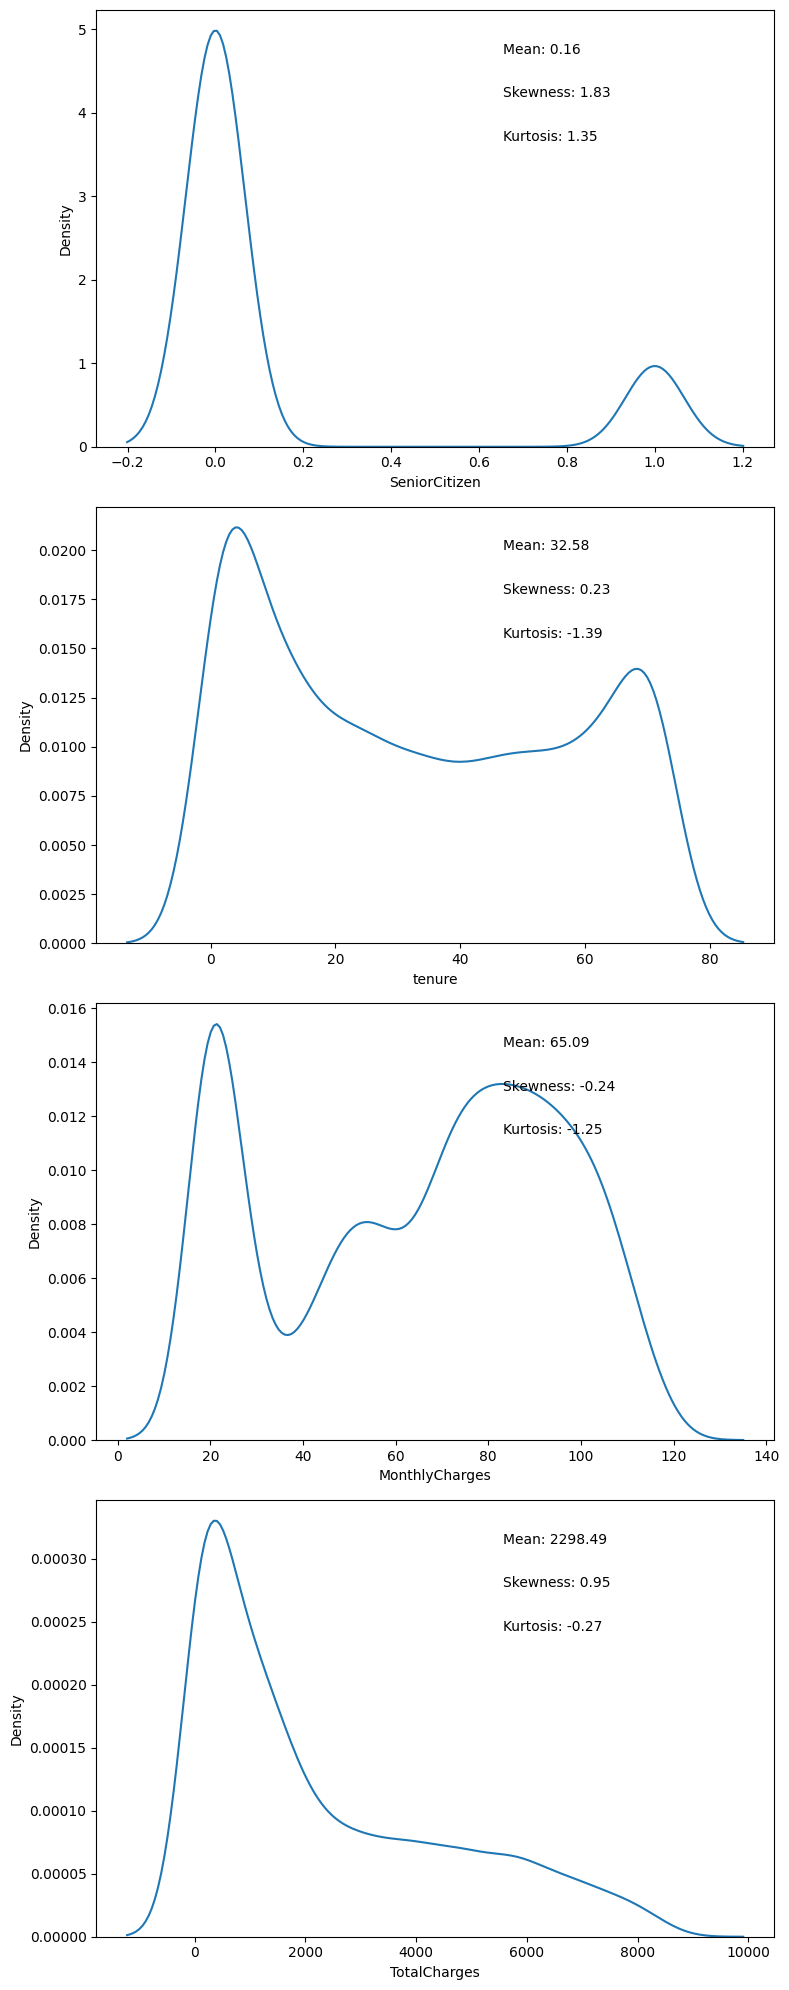

In [141]:
# Plot KDEs(kernel density estimation) for all columns
fig, axes = plt.subplots(nrows=len(numerical_columns), figsize=(8, 20))
for i, col in enumerate(numerical_columns):
    sns.kdeplot(data= valid_data, x=col, ax=axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
   
    # Calculate mean, skewness, and kurtosis
    mean_val = valid_data[col].mean()
    skewness_val = valid_data[col].skew()
    kurtosis_val = valid_data[col].kurtosis()
   
    # Add mean, skewness, and kurtosis as text annotations
    axes[i].text(0.6, 0.9, f'Mean: {mean_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.8, f'Skewness: {skewness_val:.2f}', transform=axes[i].transAxes)
    axes[i].text(0.6, 0.7, f'Kurtosis: {kurtosis_val:.2f}', transform=axes[i].transAxes)
   
plt.tight_layout()
plt.show()

### **TESTING DATASET**
1. Univariate analysis
   - Tenure
   - Monthly charges
   - Churn
2. Bivariate analysis
   - Monthly charges by churn
   - Gender by churn
4. Multivariate analysis
   - Tenure vs. MonthlyCharges vs churn
   - Correlation matrix

 <h1 style="text-decoration: underline;">1. Univariate Analysis</h1>

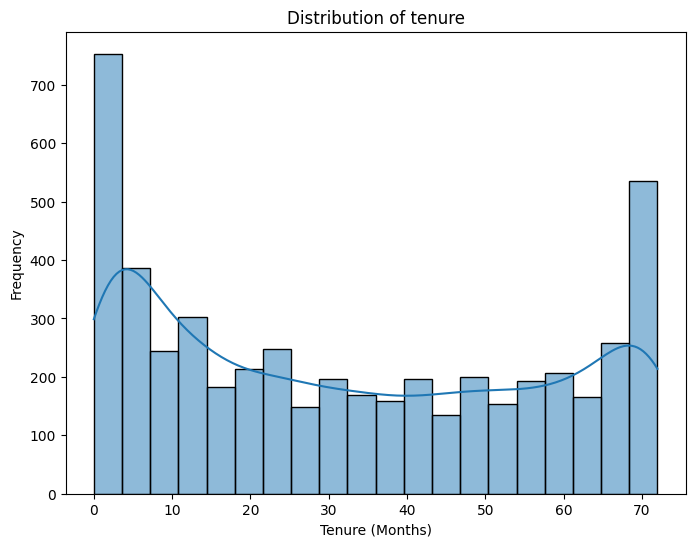

Summary statistics for Tenure:
count    5043.000000
mean       32.576641
std        24.529807
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


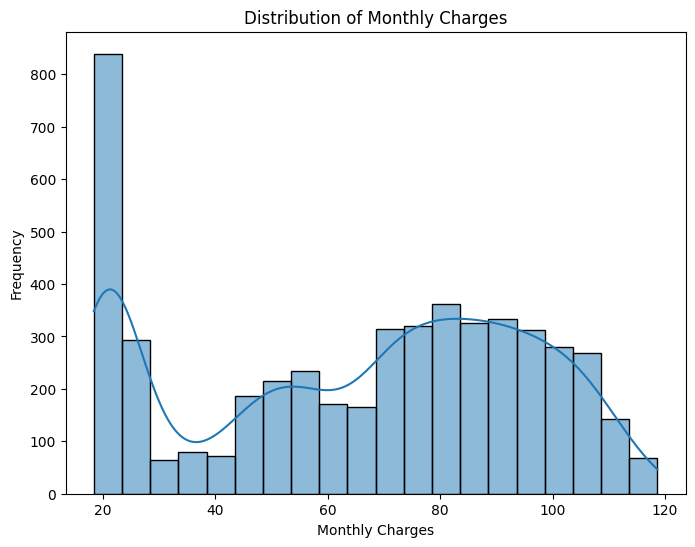


Summary statistics for Monthly Charges:
count    5043.000000
mean       65.090214
std        30.068133
min        18.400000
25%        35.775000
50%        70.550003
75%        90.050003
max       118.650002
Name: MonthlyCharges, dtype: float64


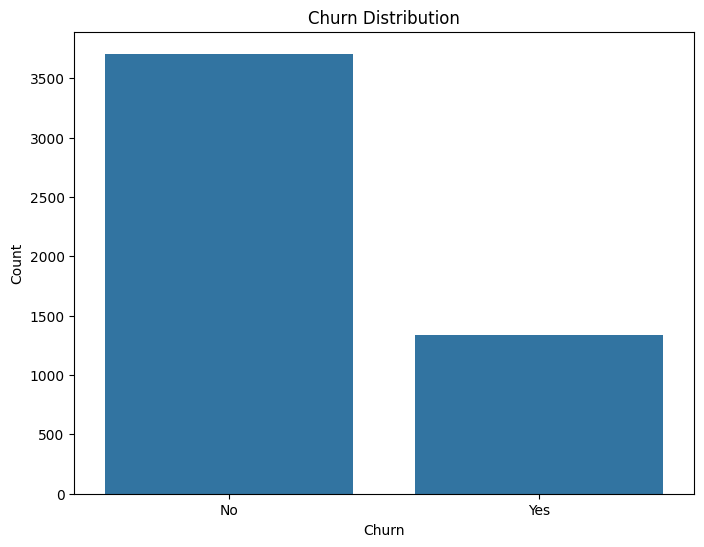


Churn distribution:
Churn
No     3707
Yes    1336
Name: count, dtype: int64


In [142]:
# Tenure
plt.figure(figsize=(8, 6))
sns.histplot(valid_data['tenure'], bins=20, kde=True)
plt.title('Distribution of tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()

print("Summary statistics for Tenure:")
print(valid_data['tenure'].describe())

# Monthly Charges
plt.figure(figsize=(8, 6))
sns.histplot(valid_data['MonthlyCharges'], bins=20, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()

print("\nSummary statistics for Monthly Charges:")
print(valid_data['MonthlyCharges'].describe())

# Churn
plt.figure(figsize=(8, 6))
sns.countplot(data=valid_data, x='Churn')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

print("\nChurn distribution:")
print(valid_data['Churn'].value_counts())

<h1 style="text-decoration: underline;">2. Bivariate Analysis</h1>

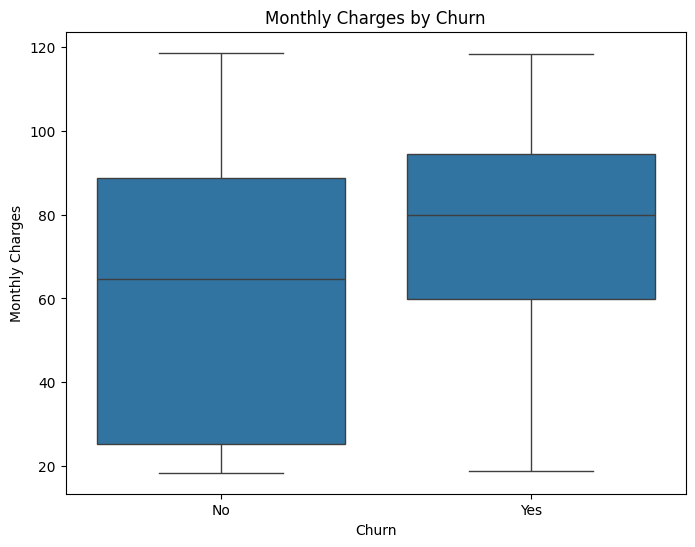

In [143]:
# Box plot of MonthlyCharges across Churn categories
plt.figure(figsize=(8, 6))
sns.boxplot(data=valid_data, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges by Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

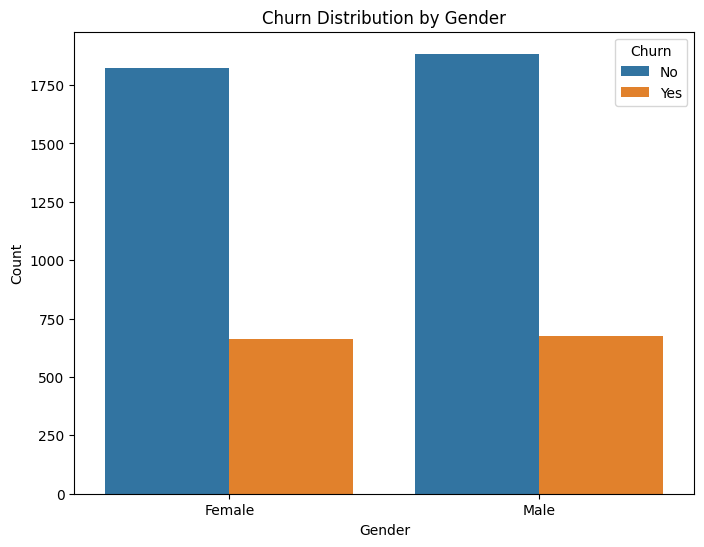

Churn Rate by Gender:
Churn         No       Yes
gender                    
Female  0.733897  0.266103
Male    0.736225  0.263775


In [144]:
# Visualizing the relationship between gender and churn
plt.figure(figsize=(8, 6))
sns.countplot(data=valid_data, x='gender', hue='Churn')
plt.title('Churn Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()
 
# Calculating churn rate by gender
churn_rate_gender = valid_data.groupby('gender')['Churn'].value_counts(normalize=True).unstack()
print("Churn Rate by Gender:")
print(churn_rate_gender)

 <h1 style="text-decoration: underline;">3. Multivariate Analysis</h1>

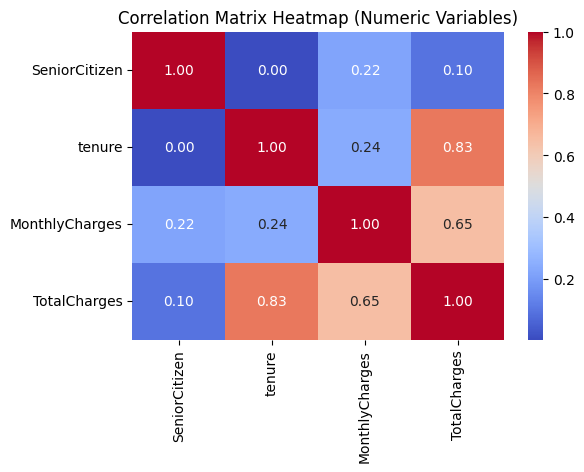

In [145]:
# Separate numeric and categorical columns
numeric_columns = valid_data.select_dtypes(include=['number']).columns
categorical_columns = valid_data.select_dtypes(include=['object', 'category']).columns

# Correlation Matrix and Heatmap for Numeric Variables
numeric_df = valid_data[numeric_columns]
numeric_correlation_matrix = numeric_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap (Numeric Variables)')
plt.show()

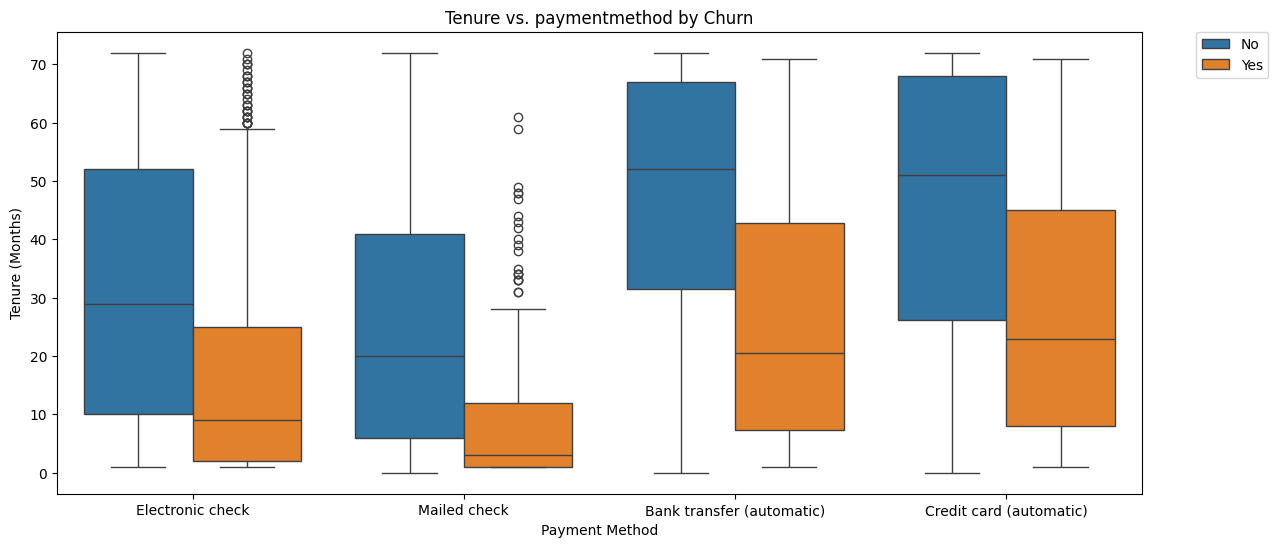

In [146]:
# Box plot of Tenure vs. MonthlyCharges vs churn
plt.figure(figsize=(14, 6))
sns.boxplot(data=valid_data, x='PaymentMethod', y='tenure', hue='Churn')
plt.title('Tenure vs. paymentmethod by Churn')
plt.xlabel('Payment Method')
plt.ylabel('Tenure (Months)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

#### <center><h1 style="text-decoration: underline;">**BUSINESS QUESTIONS**</h1></center>



#### Q1. What is the average tenure of customers who churned compared to those who stayed?

In [147]:
# Separate customers who churned from those who stayed
churned_customers = valid_data[valid_data['Churn'] == 'Yes']
stayed_customers = valid_data[valid_data['Churn'] == 'No']

# Calculate the average tenure for each group
avg_tenure_churned = churned_customers['tenure'].mean()
avg_tenure_stayed = stayed_customers['tenure'].mean()

# Compare the average tenure of the two groups
print("Average tenure of churned customers:", avg_tenure_churned)
print("Average tenure of stayed customers:", avg_tenure_stayed)

Average tenure of churned customers: 18.24176646706587
Average tenure of stayed customers: 37.74291880226598


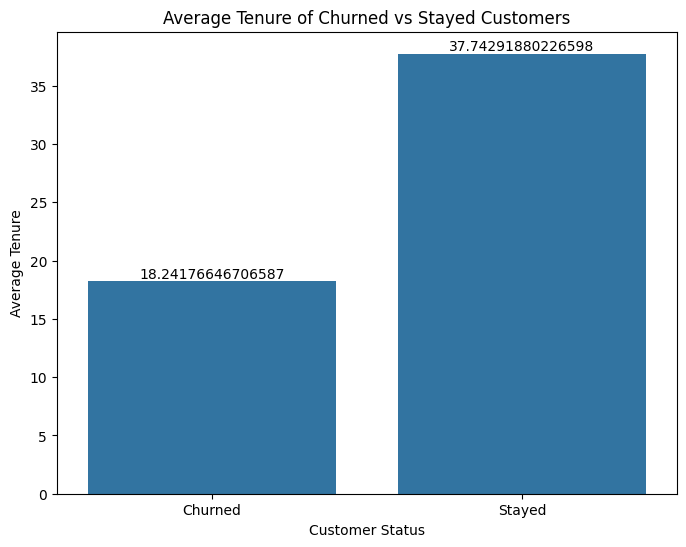

In [148]:
# Visualizing the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['Churned', 'Stayed'], y=[avg_tenure_churned, avg_tenure_stayed])
plt.title('Average Tenure of Churned vs Stayed Customers')
plt.xlabel('Customer Status')
plt.ylabel('Average Tenure')

# Adding data labels
for index, value in enumerate([avg_tenure_churned, avg_tenure_stayed]):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()

#### Q2. Do customers with partners or dependents have a lower churn rate?

In [149]:
# Calculate churn rate for customers with partners
partner_churn_rate = valid_data[valid_data['Partner'] == 'Yes']['Churn'].value_counts(normalize=True)['Yes']

# Calculate churn rate for customers without partners
no_partner_churn_rate = valid_data[valid_data['Partner'] == 'No']['Churn'].value_counts(normalize=True)['Yes']

# Calculate churn rate for customers with dependents
dependent_churn_rate = valid_data[valid_data['Dependents'] == 'Yes']['Churn'].value_counts(normalize=True)['Yes']

# Calculate churn rate for customers without dependents
no_dependent_churn_rate = valid_data[valid_data['Dependents'] == 'No']['Churn'].value_counts(normalize=True)['Yes']


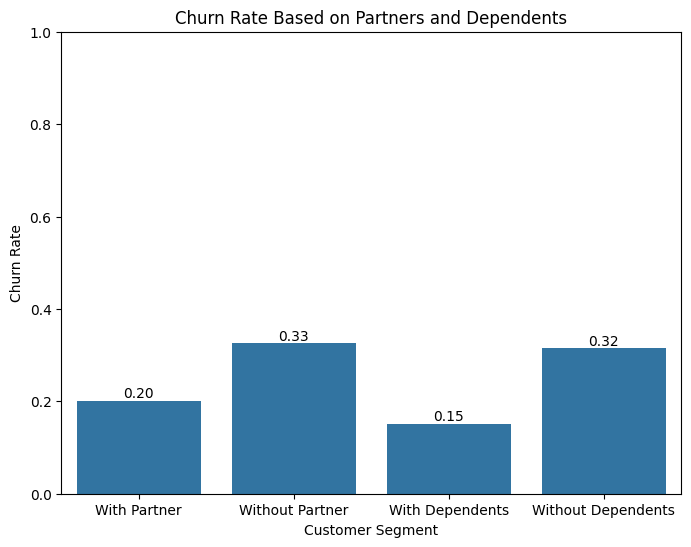

In [150]:
# Visualize the comparison
plt.figure(figsize=(8, 6))
sns.barplot(x=['With Partner', 'Without Partner', 'With Dependents', 'Without Dependents'], 
            y=[partner_churn_rate, no_partner_churn_rate, dependent_churn_rate, no_dependent_churn_rate])
plt.title('Churn Rate Based on Partners and Dependents')
plt.xlabel('Customer Segment')
plt.ylabel('Churn Rate')
plt.ylim(0, 1)  
# Set y-axis limits from 0 to 1

# Adding data labels
for index, value in enumerate([partner_churn_rate, no_partner_churn_rate, dependent_churn_rate, no_dependent_churn_rate]):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom')
plt.show()

#### Question 3: How does the presence of multiple lines affect customer churn?

To analyze this question, we can:

- Visualize the distribution of churn among customers with and without multiple lines.
- Calculate the churn rate for customers with and without multiple lines.
- Conduct a statistical test (such as a chi-square test) to determine if there is a significant association between the presence of multiple lines and churn.

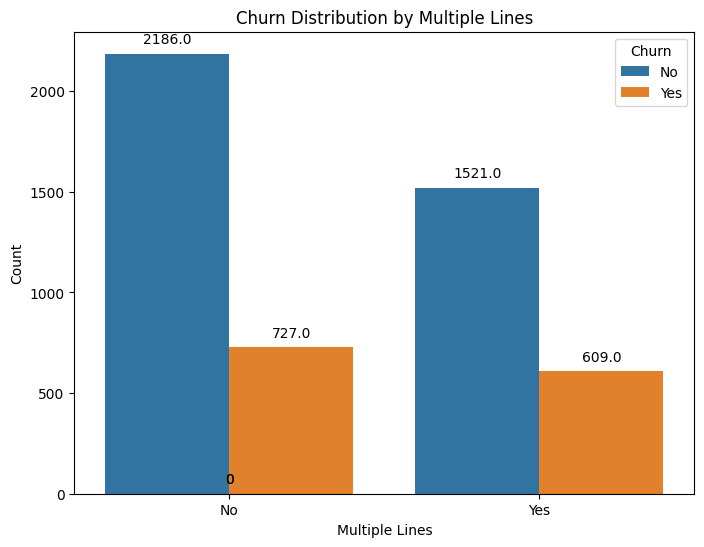

Churn Rate by Presence of Multiple Lines:
Churn                No       Yes
MultipleLines                    
No             0.750429  0.249571
Yes            0.714085  0.285915

Chi-square Test Results for Multiple Lines and Churn:
Chi-square value: 10.924980289955283
p-value: 0.012138529683043983


In [151]:
# Plotting the relationship between multiple lines and churn
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=valid_data, x='MultipleLines', hue='Churn')

# Adding data labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title('Churn Distribution by Multiple Lines')
plt.xlabel('Multiple Lines')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

# Calculating churn rate by presence of multiple lines
churn_rate_multiple_lines = valid_data.groupby('MultipleLines')['Churn'].value_counts(normalize=True).unstack()
print("Churn Rate by Presence of Multiple Lines:")
print(churn_rate_multiple_lines)

# Chi-square test for association between multiple lines and churn
chi2, p_val, _, _ = chi2_contingency(pd.crosstab(valid_data['MultipleLines'], train_df['Churn']))
print("\nChi-square Test Results for Multiple Lines and Churn:")
print("Chi-square value:", chi2)
print("p-value:", p_val)


- Customers with multiple lines tend to have a slightly higher churn rate compared to those without multiple lines.

- The chi-square test results suggest that the presence of multiple lines is significantly associated with churn.

This indicates that the presence of multiple lines may influence customer churn behavior, and it could be an important factor to consider in churn prediction and retention strategies.
Overall, these insights suggest that the presence of multiple lines could be a relevant factor in understanding and predicting customer churn.

#### Question 4: Is there a correlation between the contract term (Contract) and customer churn?

For this question, we can:

- Visualize the distribution of churn across different contract terms.
- Calculate the churn rate for each contract term category.
- Analyze the relationship between contract term and churn using a chi-square test or other appropriate statistical test.
- Additionally, we can examine the average tenure for customers with different contract terms to understand the potential impact on churn.

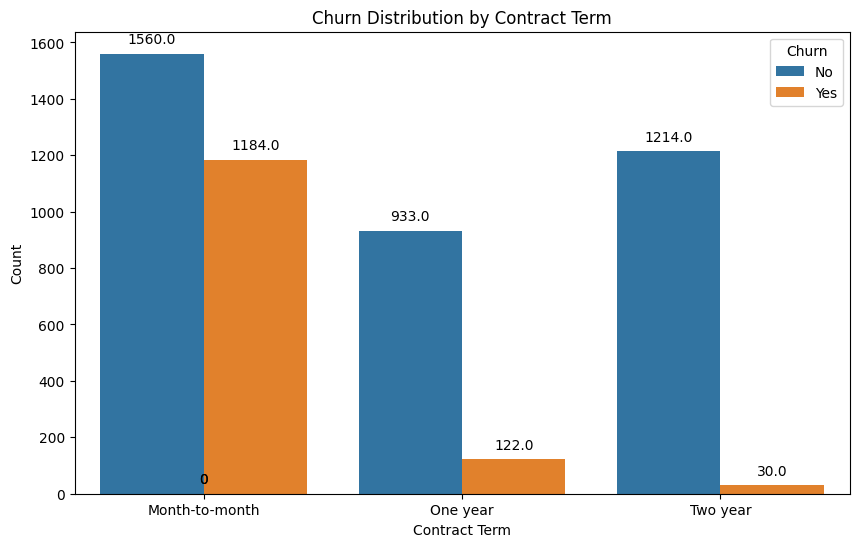


Churn Rate by Contract Term:
Churn                 No       Yes
Contract                          
Month-to-month  0.568513  0.431487
One year        0.884360  0.115640
Two year        0.975884  0.024116

Chi-square Test Results for Contract Term and Churn:
Chi-square value: 882.0901975577578
p-value: 2.86119415951209e-192


In [152]:
# Plotting the relationship between contract term and churn
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=valid_data, x='Contract', hue='Churn')

# Adding data labels to each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.title('Churn Distribution by Contract Term')
plt.xlabel('Contract Term')
plt.ylabel('Count')
plt.legend(title='Churn', loc='upper right')
plt.show()

# Calculating churn rate by contract term
churn_rate_contract = valid_data.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
print("\nChurn Rate by Contract Term:")
print(churn_rate_contract)

# Chi-square test for association between contract term and churn
chi2, p_val, _, _ = chi2_contingency(pd.crosstab(valid_data['Contract'],valid_data['Churn']))
print("\nChi-square Test Results for Contract Term and Churn:")
print("Chi-square value:", chi2)
print("p-value:", p_val)

- Customers with longer contract terms (one year and two years) have significantly lower churn rates compared to those with month-to-month contracts.

- The chi-square test results confirm that there is a strong association between contract term and churn.
This suggests that the contract term is a critical factor influencing customer churn behavior, with longer-term contracts leading to lower churn rates.

Overall, these insights indicate that contract term is a significant predictor of customer churn, and it should be a key consideration in churn prediction models and retention strategies. Offering longer-term contracts may help reduce churn and improve customer retention rates.

#### QN.5 What are the common payment methods (Payment Method) among customers who churned?


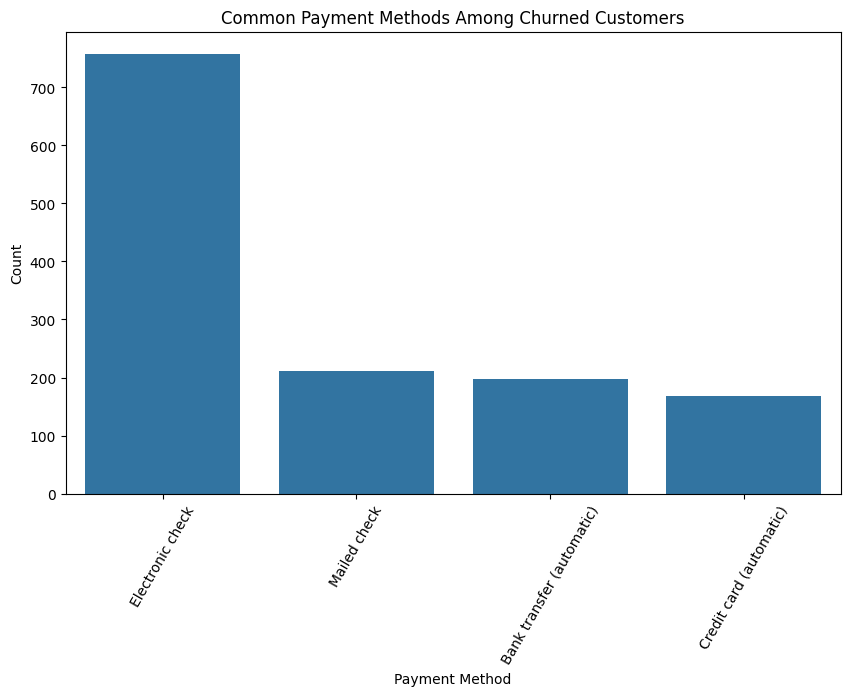

In [162]:
churned_customers = valid_data[valid_data['Churn'] == 'Yes']
common_payment_methods = churned_customers['PaymentMethod'].value_counts()

plt.figure(figsize=(10,6))
plt.bar(common_payment_methods.index, common_payment_methods.values)
plt.title('Common Payment Methods Among Customers Who Churned')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.show()

#### QN.6 How does the availability of tech-related services (e.g., OnlineSecurity, TechSupport) impact churn rates?

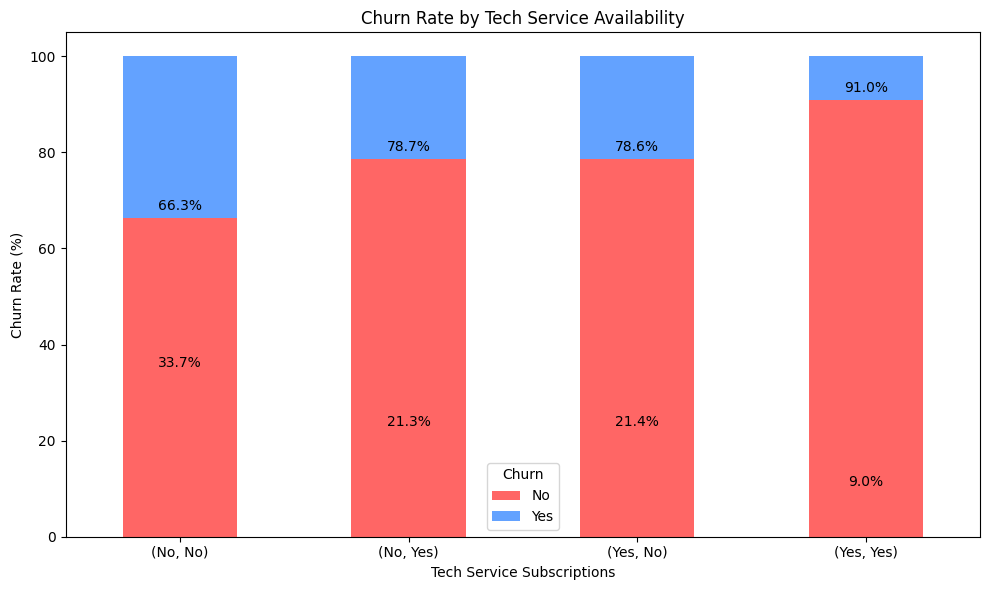

In [181]:
# Group data by subscription to tech services and churn
tech_service_groups = valid_data.groupby(['OnlineSecurity', 'TechSupport', 'Churn'])['gender'].count().unstack(fill_value=0)

# Calculate churn rate for each group
churn_rate = tech_service_groups.div(tech_service_groups.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))  # Create a figure and axis for better control
churn_rate.plot(kind='bar', stacked=True, color=['#FF6665', '#63A2FF'], ax=ax)
plt.xlabel('Tech Service Subscriptions')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Tech Service Availability')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability

# Add percentage labels to bars
for container in ax.containers:
    rects = container.get_children()
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 1, f"{height:.1f}%", ha='center', va='bottom')

plt.legend(title='Churn')
plt.tight_layout()  # Adjust spacing to accommodate labels
plt.show()

#### QN 7. What percentage of customers who churned had streaming services (StreamingTV, StreamingMovies)?
 

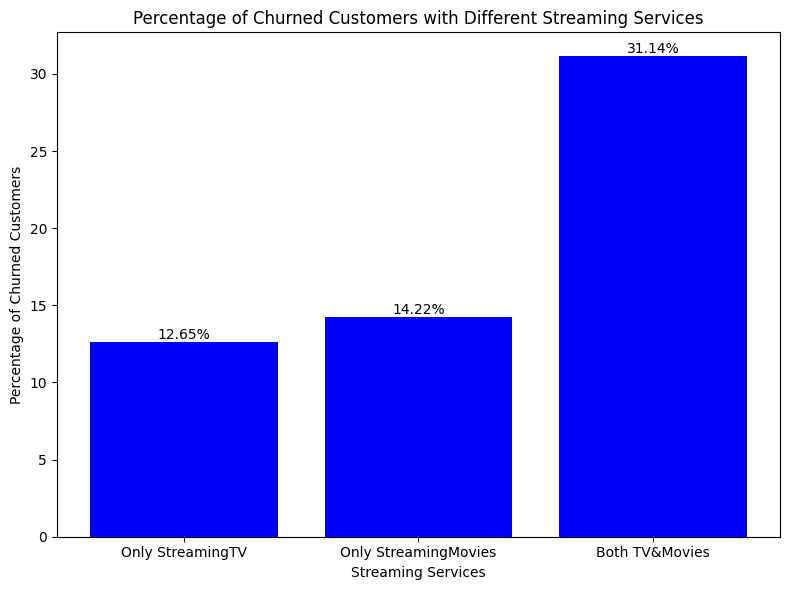

In [188]:

# Filter the DataFrame to include only churned customers
churned_customers = valid_data[valid_data['Churn'] == 'Yes']
 
# Calculate the number of churned customers with different streaming services
streaming_tv_churned_count = len(churned_customers[(churned_customers['StreamingTV'] == 'Yes') & (churned_customers['StreamingMovies'] == 'No')])
streaming_movies_churned_count = len(churned_customers[(churned_customers['StreamingTV'] == 'No') & (churned_customers['StreamingMovies'] == 'Yes')])
both_streaming_churned_count = len(churned_customers[(churned_customers['StreamingTV'] == 'Yes') & (churned_customers['StreamingMovies'] == 'Yes')])
 
# Calculate the total number of churned customers
total_churned_customers = len(churned_customers)
 
# Calculate the percentage of churned customers for each category
percentage_streaming_tv_churned = (streaming_tv_churned_count / total_churned_customers) * 100
percentage_streaming_movies_churned = (streaming_movies_churned_count / total_churned_customers) * 100
percentage_both_streaming_churned = (both_streaming_churned_count / total_churned_customers) * 100
 
# Plotting the grouped bar plot
categories = ['Only StreamingTV', 'Only StreamingMovies', 'Both TV&Movies']
percentages = [percentage_streaming_tv_churned, percentage_streaming_movies_churned, percentage_both_streaming_churned]
 
plt.figure(figsize=(8, 6))
bars = plt.bar(categories, percentages, color=['blue'])
 
# Add data labels on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')
 
plt.xlabel('Streaming Services')
plt.ylabel('Percentage of Churned Customers')
plt.title('Percentage of Churned Customers with Different Streaming Services')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

#### QN 8.Is there a difference in churn rates between senior citizens and non-senior citizens?

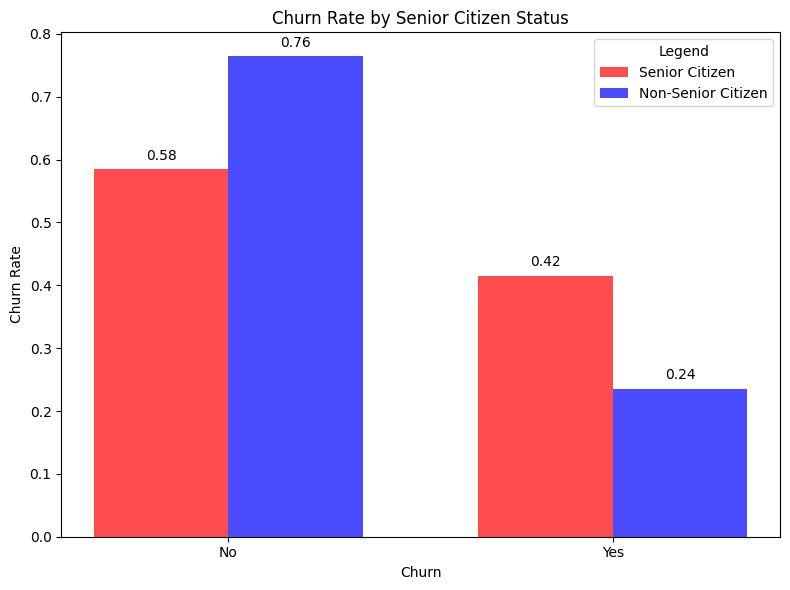

In [154]:
# Calculate churn rates for senior and non-senior citizens
senior_churn_rate = valid_data[valid_data['SeniorCitizen'] == 1]['Churn'].value_counts(normalize=True)
non_senior_churn_rate = valid_data[valid_data['SeniorCitizen'] == 0]['Churn'].value_counts(normalize=True)

# Plotting the grouped bar plot
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = range(len(senior_churn_rate))

bars1 = plt.bar(index, senior_churn_rate, bar_width, color='red', label='Senior Citizen', alpha=0.7)
bars2 = plt.bar([i + bar_width for i in index], non_senior_churn_rate, bar_width, color='blue', label='Non-Senior Citizen', alpha=0.7)

# Adding data labels to each bar
def add_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.xlabel('Churn')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Senior Citizen Status')
plt.xticks([i + bar_width / 2 for i in index], senior_churn_rate.index)
plt.legend(title='Legend')
plt.tight_layout()
plt.show()



## Hypothesis Testing

### Test 1

<Figure size 1050x600 with 0 Axes>

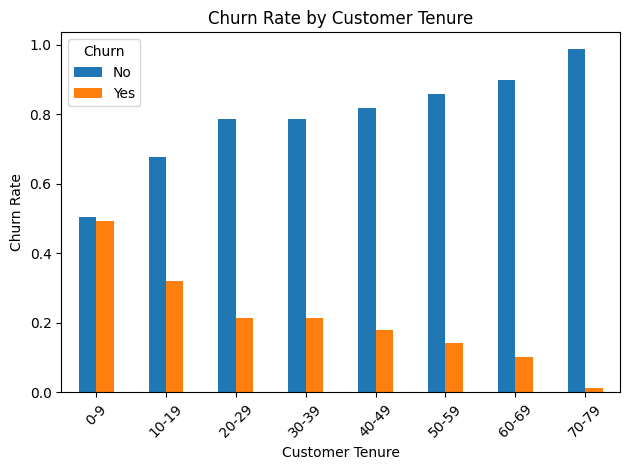

In [155]:
# Group the data by customer tenure range and calculate the churn rate
bins = [0] + [10 * i for i in range(1, 9)] # Define bins for grouping
labels = [f"{i}-{i+9}" for i in range(0, 80, 10)]  # Define labels for the bins
valid_data['Tenure_Group'] = pd.cut(valid_data['tenure'], bins=bins, labels=labels, include_lowest=True)
grouped_data = valid_data.groupby('Tenure_Group')['Churn'].value_counts(normalize=True).unstack()
 
# Plotting the bar plot
plt.figure(figsize=(10.5, 6))
grouped_data.plot(kind='bar')
plt.xlabel('Customer Tenure')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Customer Tenure')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Churn')
plt.tight_layout()  # Adjust layout for better visualization
plt.show()
 

In [156]:
# Encode 'churn' column into numeric values
valid_data['churn_numeric'] = valid_data['Churn'].replace({'Yes': 1, 'No': 0})

# Calculate the median value for tenure
median_tenure = valid_data['tenure'].median()

# Divide the data into two categories
long_tenure = valid_data[valid_data['tenure'] >= median_tenure]['churn_numeric']
short_tenure = valid_data[valid_data['tenure'] < median_tenure]['churn_numeric']

# Perform Fisher's exact test
odds_ratio, p_value = fisher_exact([[long_tenure.sum(), short_tenure.sum()],
                                    [len(long_tenure), len(short_tenure)]])

# Print the test statistic (odds ratio) and p-value
print("Odds ratio:", odds_ratio)
print("P-value:", p_value)

# State the significance level
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in churn rates between customers with shorter and longer tenure.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in churn rates between customers with shorter and longer tenure.")



Odds ratio: 0.33632517216350666
P-value: 2.8376888726914e-62
Reject Null Hypothesis: There is a significant difference in churn rates between customers with shorter and longer tenure.


### Test 2

In [160]:
# Encode 'churn' column into numeric values
valid_data['churn_numeric'] = valid_data['Churn'].replace({'Yes': 1, 'No': 0})

# Calculate the median value for monthlycharge
median_monthlycharge = valid_data['MonthlyCharges'].median()

# Divide the data into two categories
high_monthlycharge = valid_data[valid_data['MonthlyCharges'] >= median_monthlycharge]['churn_numeric']
low_monthlycharge = valid_data[valid_data['MonthlyCharges'] < median_monthlycharge]['churn_numeric']

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(high_monthlycharge, low_monthlycharge)

# Print the test statistic (U statistic) and p-value
print("Mann-Whitney U statistic:", statistic)
print("P-value:", p_value)

# State the significance level
alpha = 0.05

# Compare p-value to the significance level
if p_value < alpha:
    print("Reject Null Hypothesis: There is a significant difference in churn rates between customers with higher and lower monthly charge.")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference in churn rates between customers with higher and lower monthly charge.")


Mann-Whitney U statistic: 3743974.5
P-value: 2.219391973354535e-46
Reject Null Hypothesis: There is a significant difference in churn rates between customers with higher and lower monthly charge.
